<a href="https://colab.research.google.com/github/elanghairilanam/Portfolio-Data-Science/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir('/content/gdrive/MyDrive/Dataset/Lung Cancer')

In [ ]:
os.listdir()

['survey lung cancer.csv']

In [ ]:
lung_cancer = pd.read_csv('survey lung cancer.csv')

In [ ]:
# Melihat data dari dataset yang kita punya

lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
# Mengubah kolom LUNG_CANCER menjadi 0 dan 1

lung_cancer['LUNG_CANCER'] = lung_cancer['LUNG_CANCER'].map({'YES': 2, 'NO': 1})

In [ ]:
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [ ]:
# mengecek data duplicated

lung_cancer.duplicated().sum()

33

In [ ]:
# Menghapus data duplicated

lung_cancer.drop_duplicates(inplace=True)

In [ ]:
lung_cancer.duplicated().sum()

0

In [ ]:
# sudah tidak ada data duplicated sekarang kita cek adakah data yang hilang

lung_cancer.isna().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
# Selanjutnya kita akan menghapus kolom gender karena kita tidak membutuhkan
# data gender dikhawatirkan akan terjadi bias

lung_cancer.drop('GENDER', axis=1,inplace=True)

lung_cancer.head()


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [ ]:
# buat salinan dataframe dan ubah nilai 2 = 1, 1 = 0

lung_cancer_copy = lung_cancer.copy()

for column in lung_cancer_copy.columns:
    if column != 'AGE':  # Lewati kolom 'AGE'
        lung_cancer_copy[column] = lung_cancer_copy[column].map({2: 1, 1: 0})


lung_cancer_copy.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


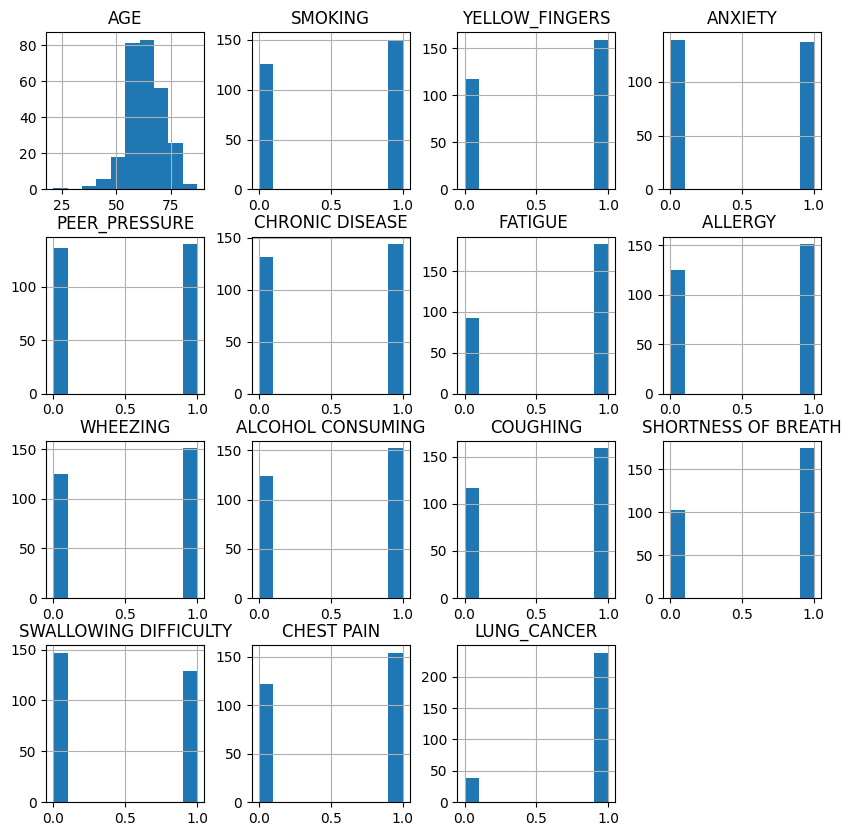

In [ ]:
# melihat menyebaran data

lung_cancer_copy.hist(figsize=(10,10))
plt.show()

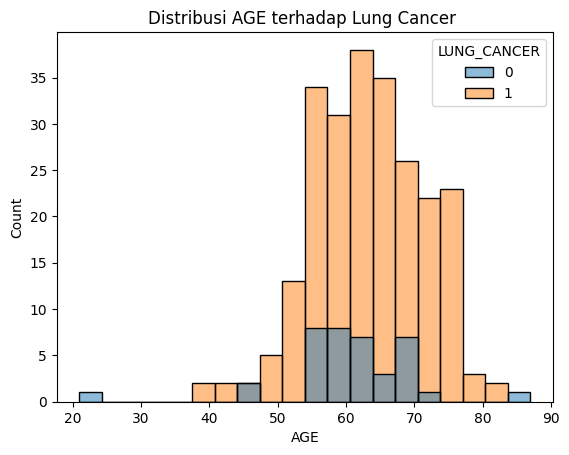

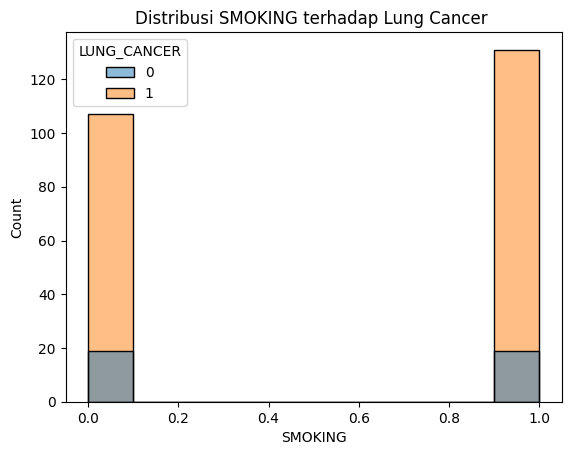

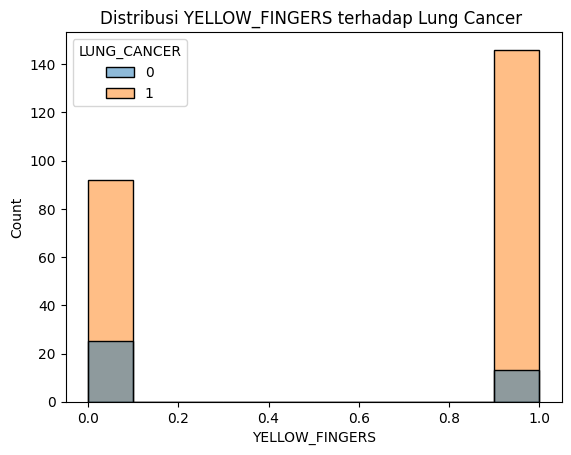

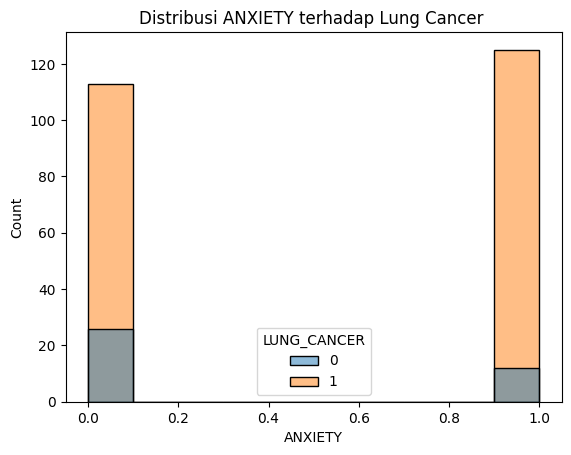

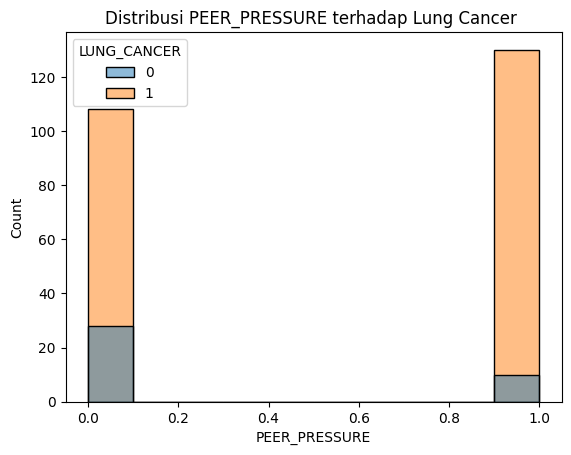

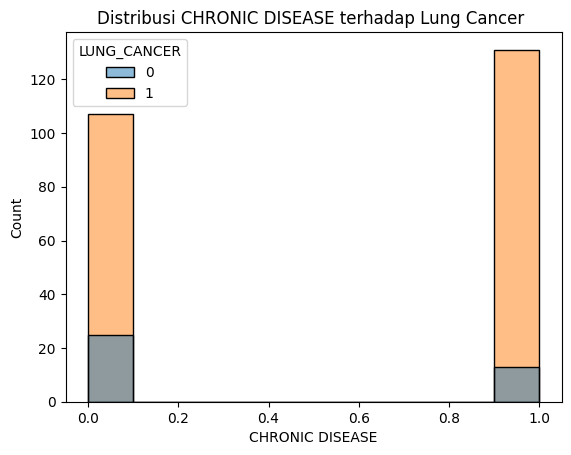

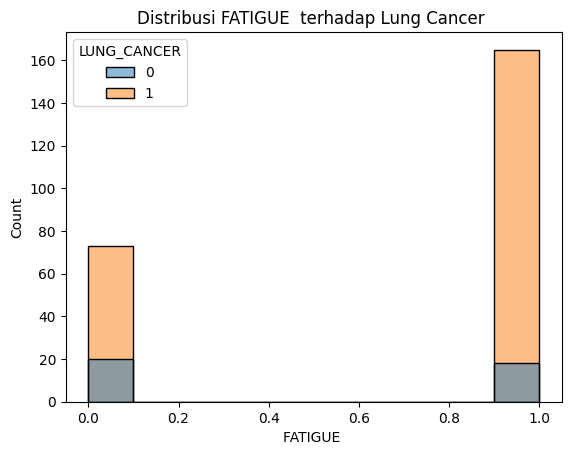

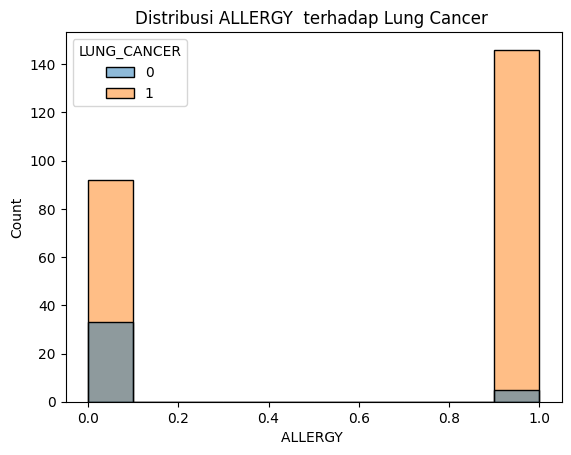

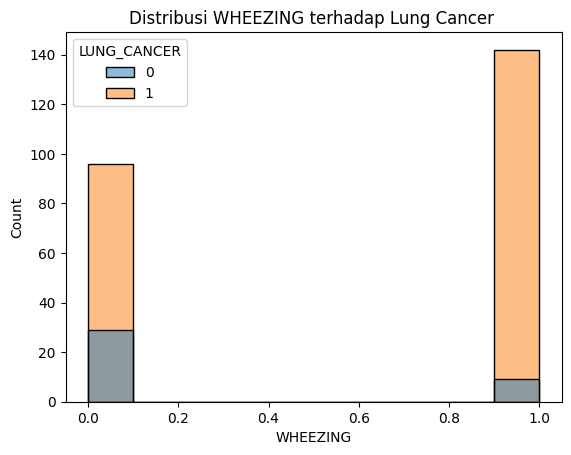

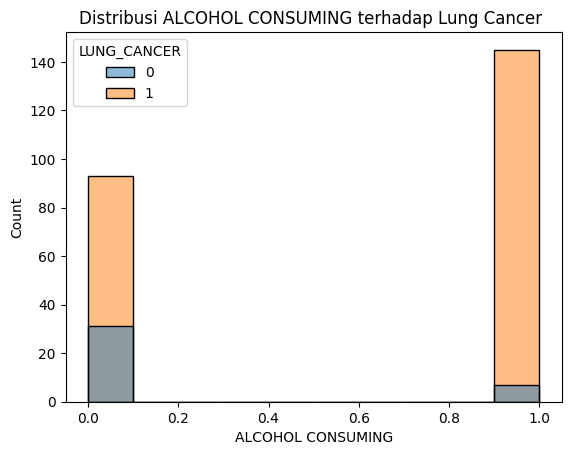

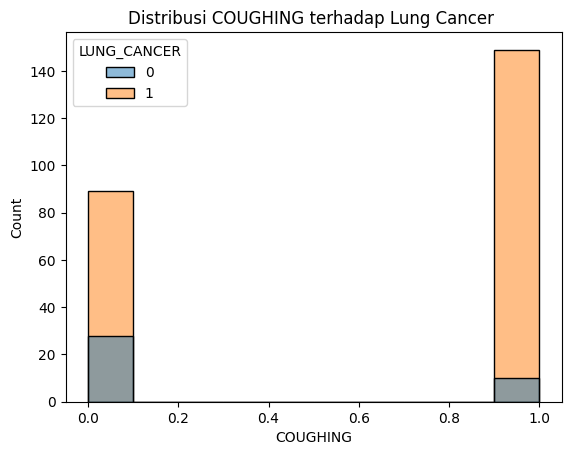

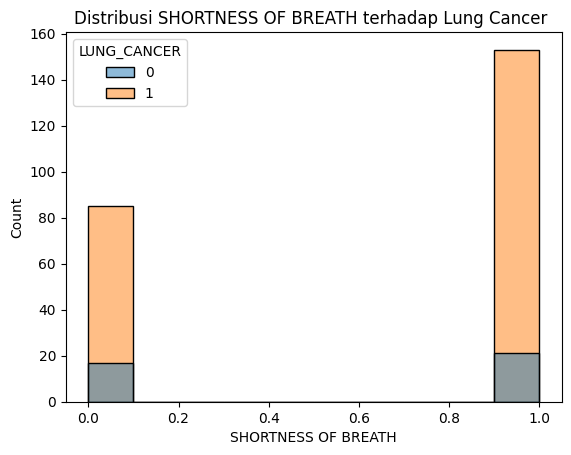

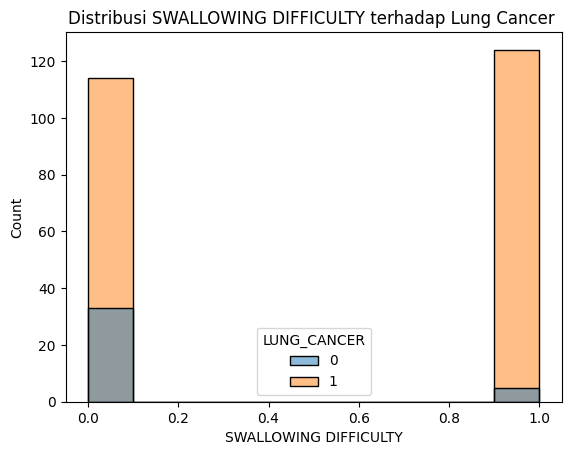

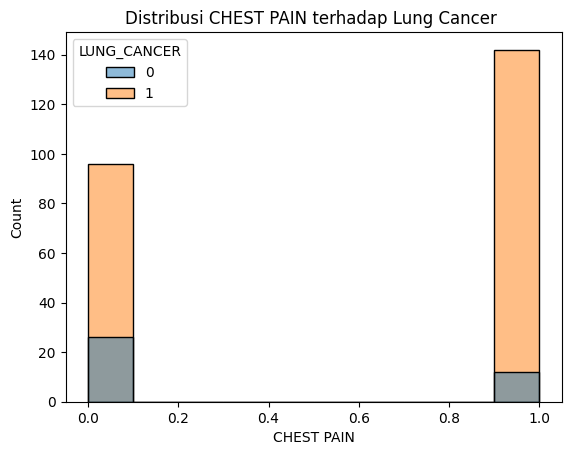

In [ ]:
for col in lung_cancer_copy.columns:
  if col != 'LUNG_CANCER':
    # Indent this line to be part of the if block
    sns.histplot(data = lung_cancer_copy, x = col, hue = 'LUNG_CANCER')
    plt.title(f'Distribusi {col} terhadap Lung Cancer ')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# define x dan y
x = lung_cancer_copy.drop('LUNG_CANCER', axis = 1)
y = lung_cancer_copy['LUNG_CANCER']

# split data ke train dan test set
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# membuat object MinMaxScaler
scaler = MinMaxScaler()

# sesuaikan scaler dengan data pelatihan
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
# tranforamsi data test dan train
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
#membuat prediksi
y_train_pred_dt = dt.predict(X_train_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

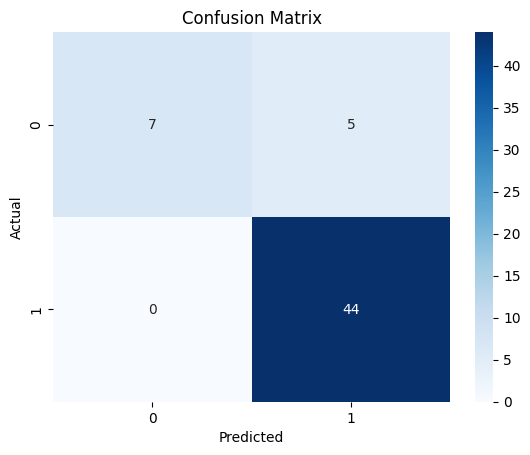

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_dt)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()